# Declaration of Originality

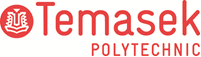

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Koo Qing Le
* Tutorial Group                : PC05
* Tutor						    : Mr Kian Eng Ong
* Submission Date               : 11th Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import libs


# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
FILE_PATH = "Breast_Cancer.csv"
df = pd.read_csv(FILE_PATH)
df



,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.shape

(4024, 16)

In [4]:
X = df.drop(columns=["Status"])
y = df["Status"]

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']
Numerical columns: ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
## Check for missing data
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
## Describe data distribution
df.describe()
df["Status"].value_counts()
df["Status"].value_counts(normalize=True)

Status
Alive    0.846918
Dead     0.153082
Name: proportion, dtype: float64

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [8]:
## Understanding distribution of target
df["Status"].value_counts()


Status
Alive    3408
Dead      616
Name: count, dtype: int64

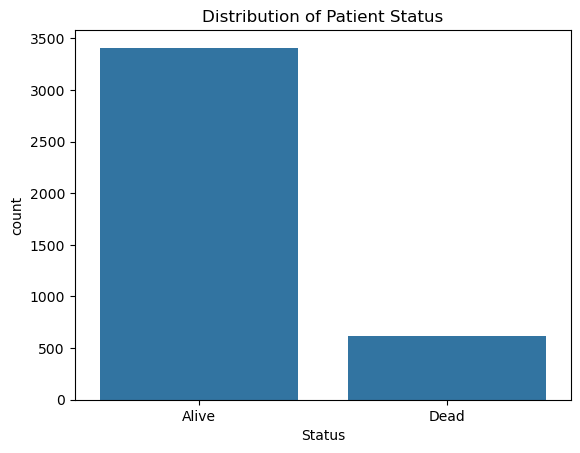

In [9]:
col_y = "Status"
sns.countplot(x="Status", data=df)
plt.title("Distribution of Patient Status")
plt.show()


### 2.3.1.2 Understanding distribution of features

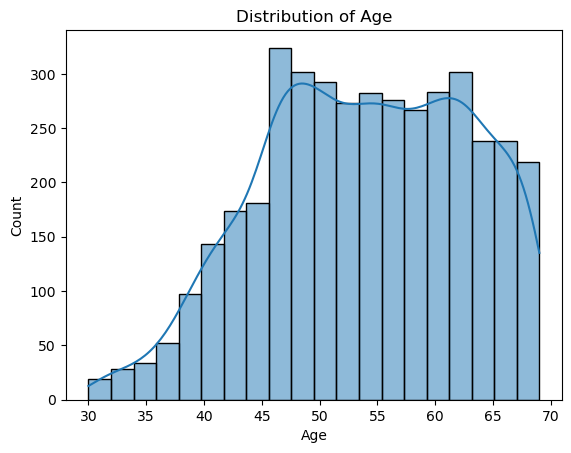

In [10]:
## Understanding distribution of features
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()


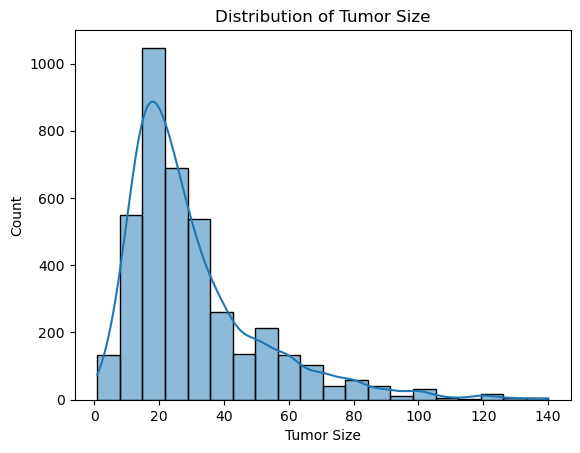

In [11]:
# Distribution of Tumor Size
sns.histplot(df["Tumor Size"], bins=20, kde=True)
plt.title("Distribution of Tumor Size")
plt.xlabel("Tumor Size")
plt.ylabel("Count")
plt.show()


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Count and proportion
counts = df["Status"].value_counts()
proportions = df["Status"].value_counts(normalize=True)
 
print("Class Counts:\n", counts)
print("\nClass Proportions:\n", proportions)
 

Class Counts:
 Status
Alive    3408
Dead      616
Name: count, dtype: int64

Class Proportions:
 Status
Alive    0.846918
Dead     0.153082
Name: proportion, dtype: float64


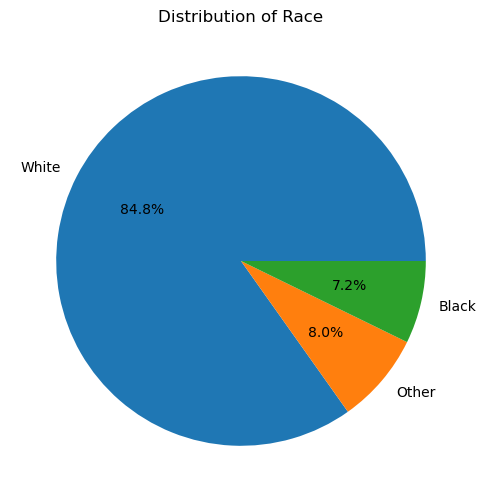

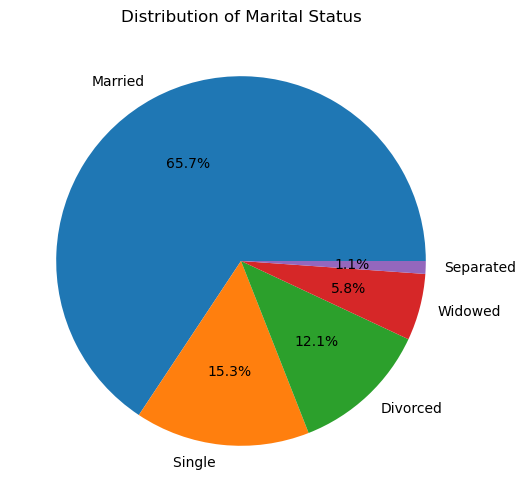

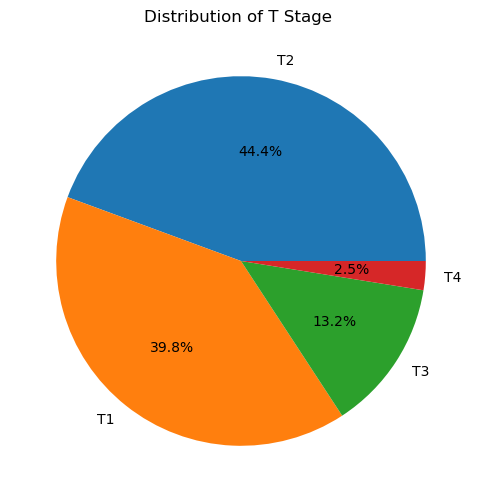

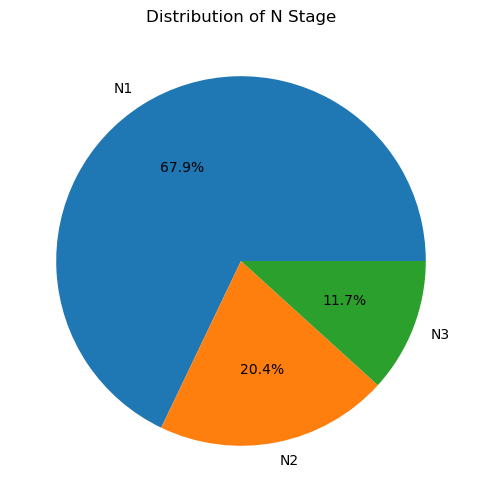

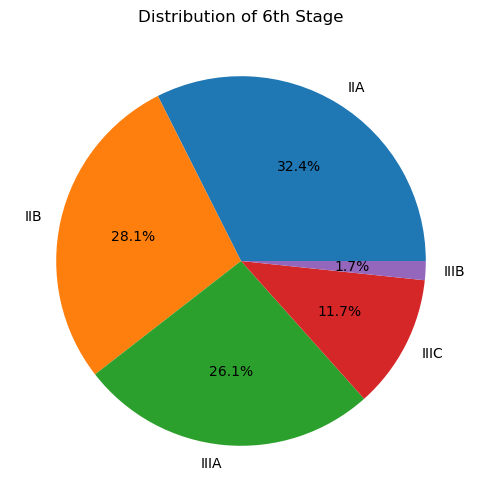

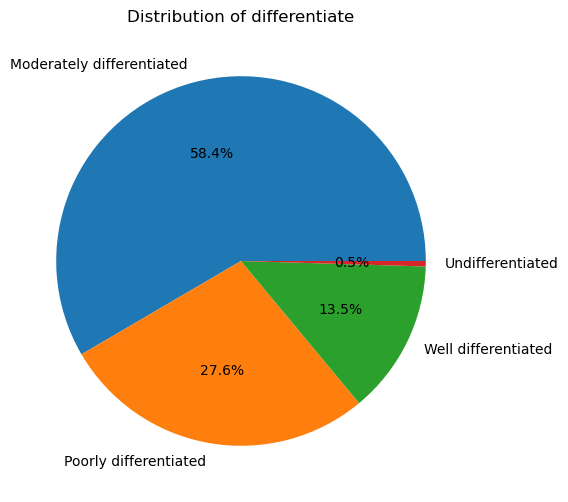

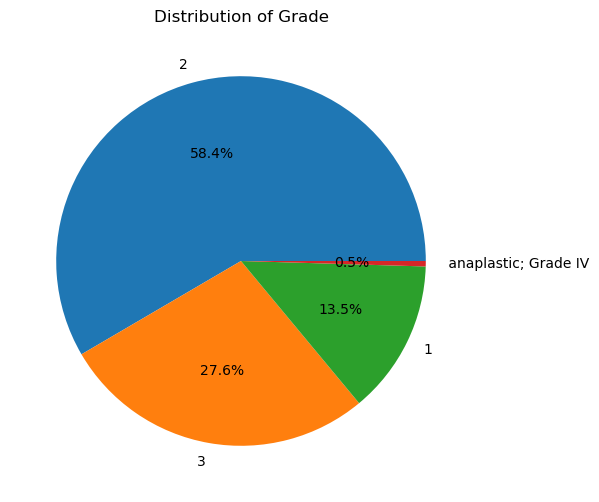

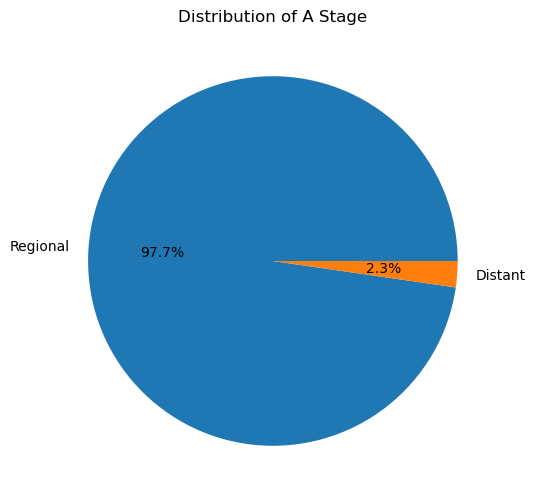

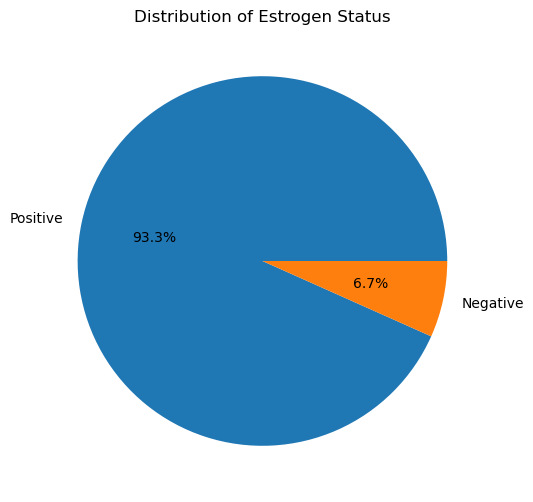

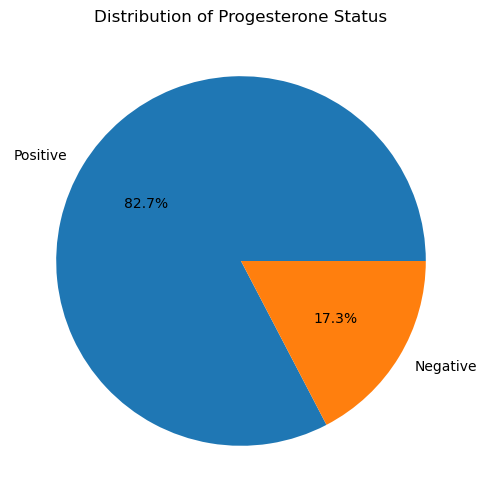

In [13]:
col_y = "Status"
for col in df.select_dtypes(include=["object"]).columns:
    if col != col_y:
        df[col].value_counts().plot(
            kind="pie",
            autopct="%1.1f%%",
            figsize=(6,6)
        )
        plt.title(f"Distribution of {col}")
        plt.ylabel("")
        plt.show()


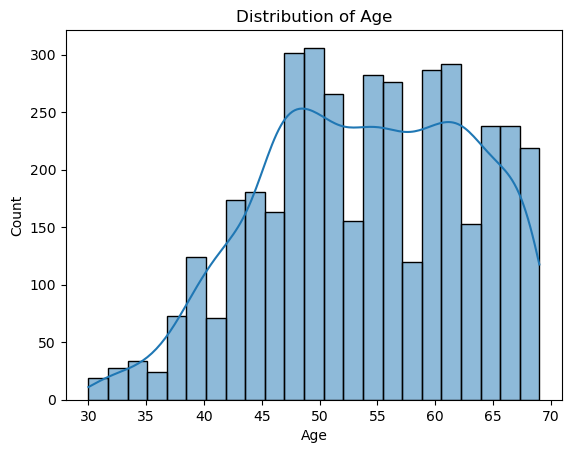

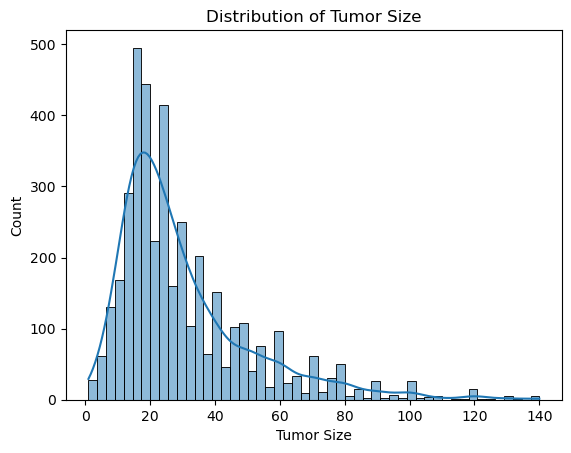

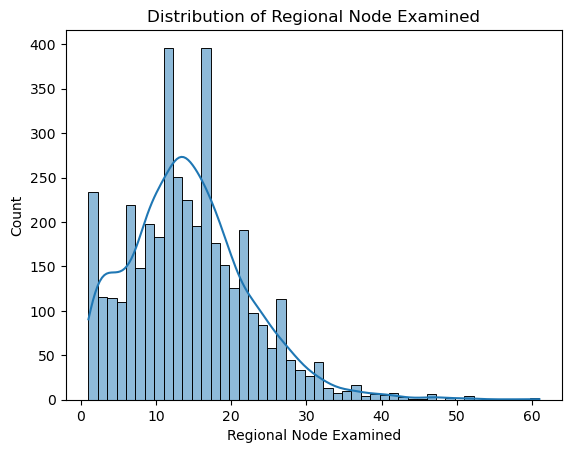

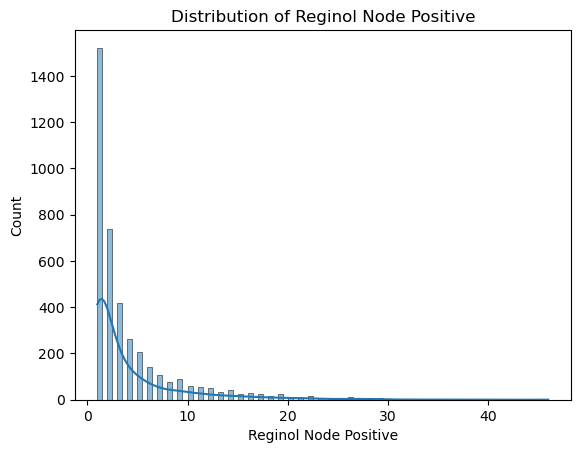

In [14]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("Survival Months", errors="ignore")

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### 2.3.2 Understanding relationship between variables

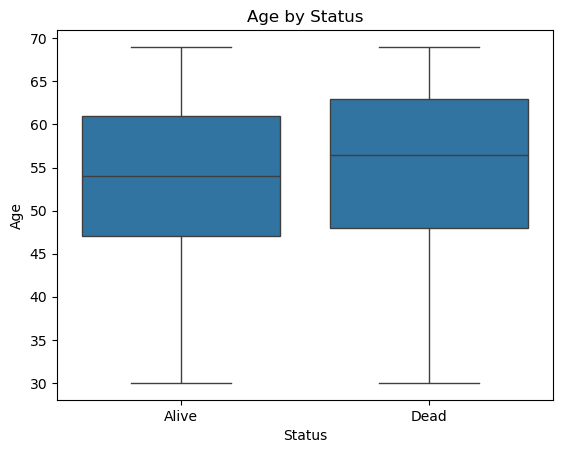

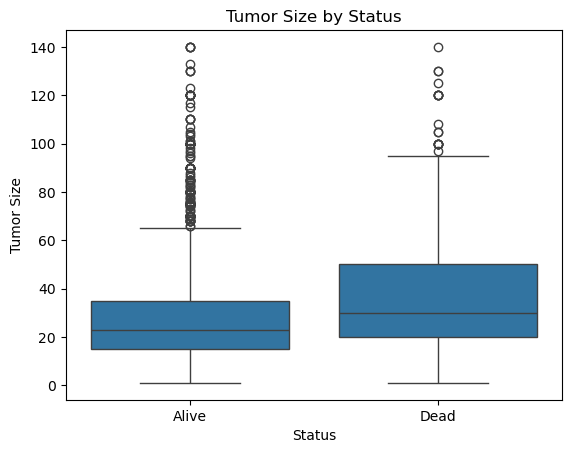

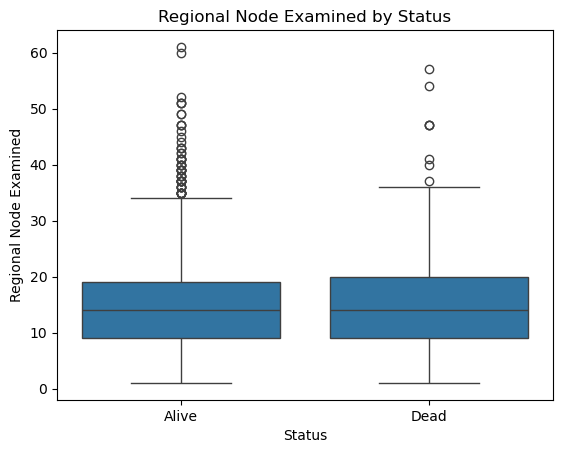

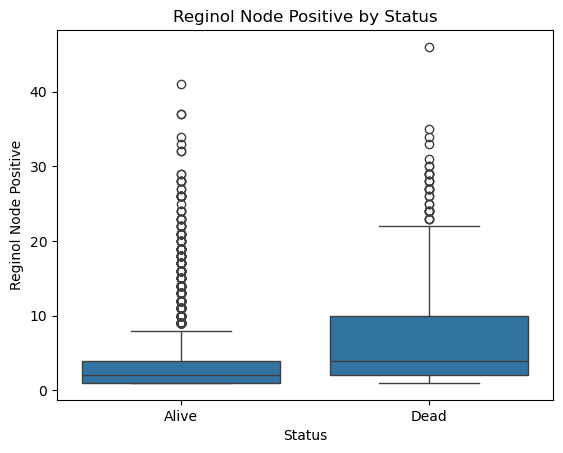

In [15]:
## Understanding relationship between variables
for col in ["Age", "Tumor Size", "Regional Node Examined", "Reginol Node Positive"]:
    sns.boxplot(x="Status", y=col, data=df)
    plt.title(f"{col} by Status")
    plt.show()



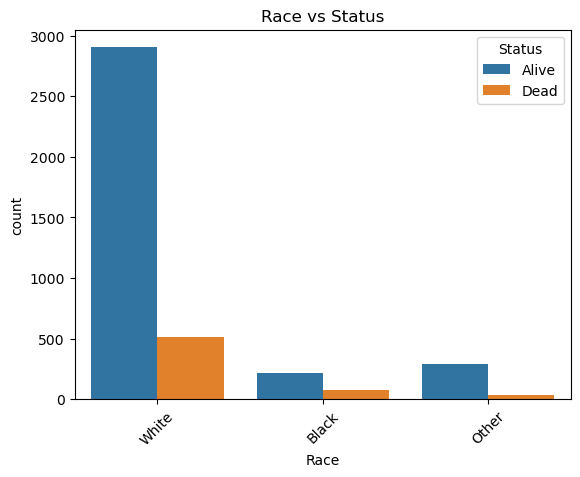

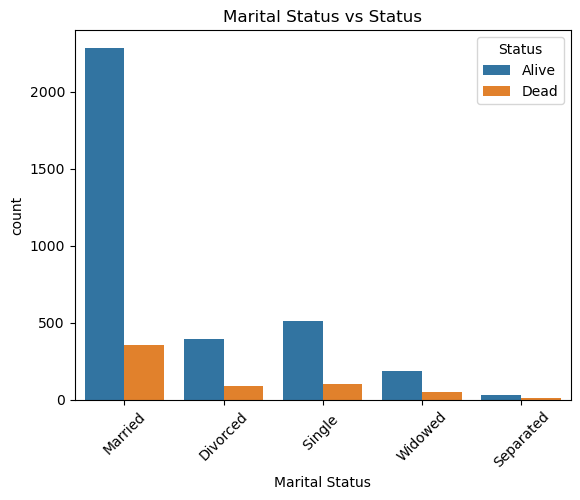

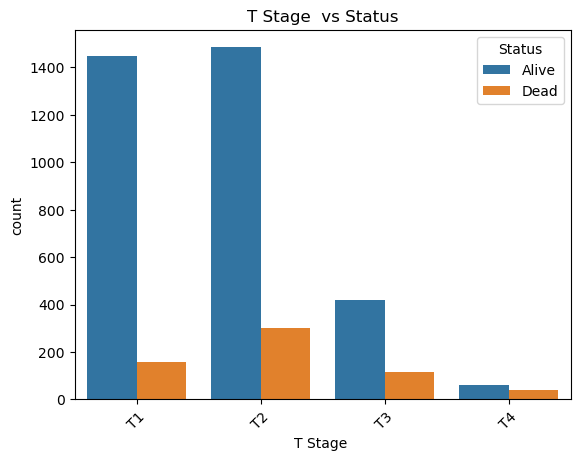

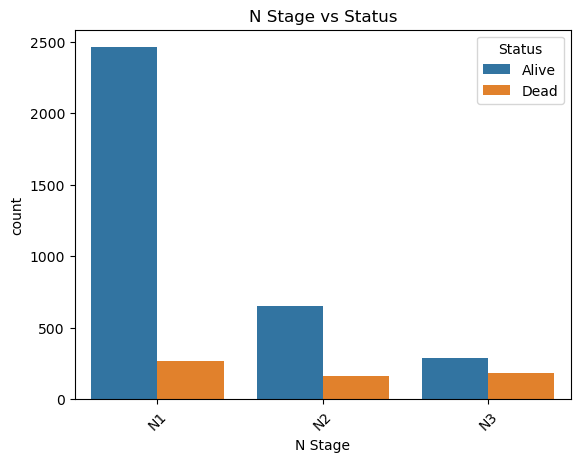

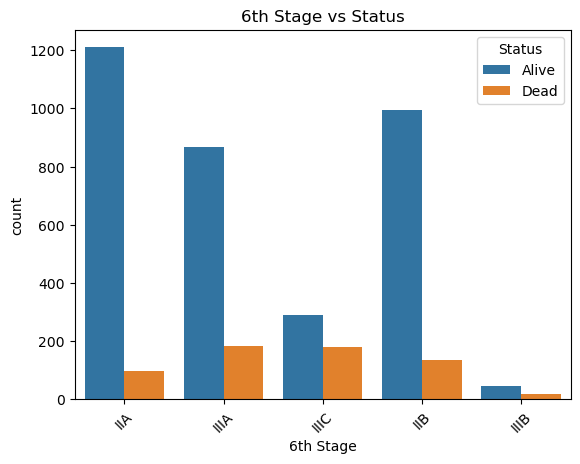

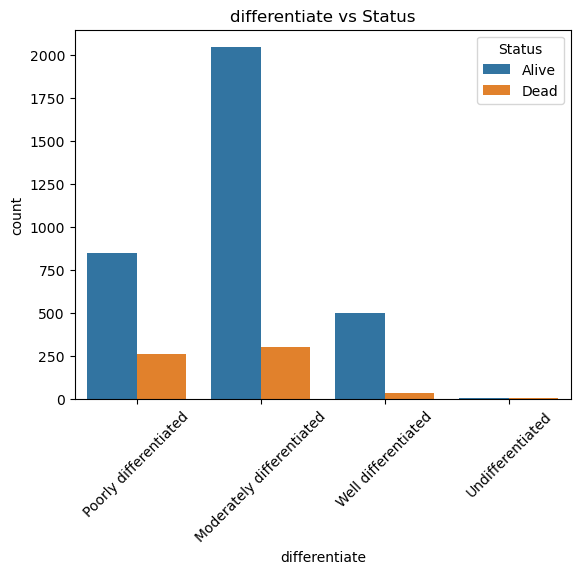

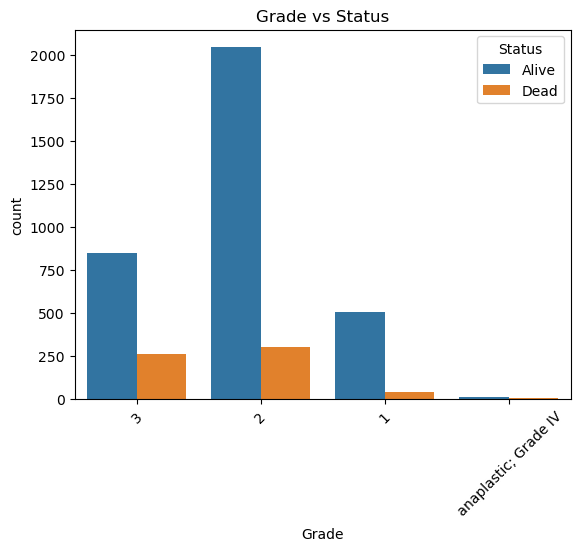

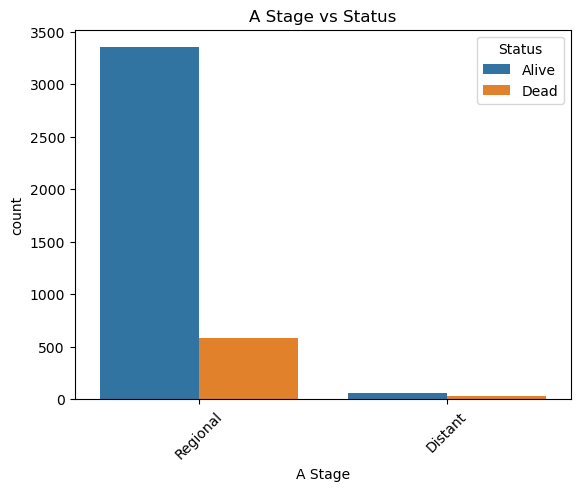

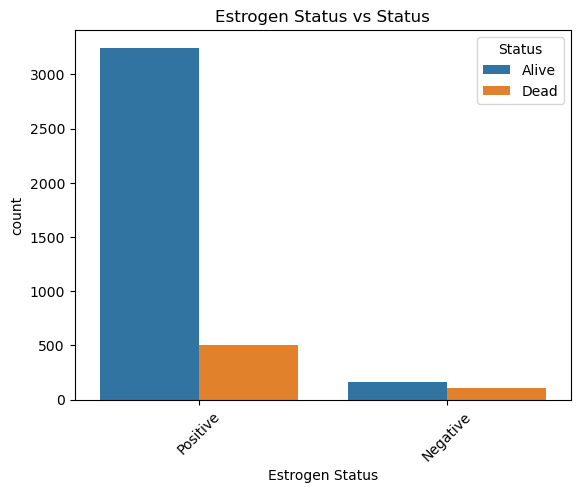

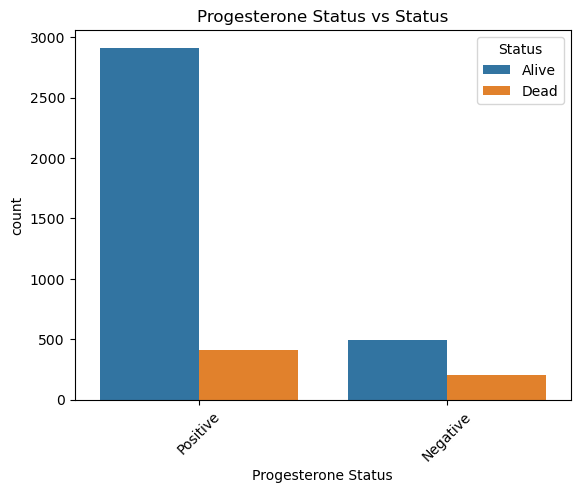

In [16]:
cat_cols = df.select_dtypes(include=["object"]).columns.drop("Status")

for col in cat_cols:
    sns.countplot(x=col, hue="Status", data=df)
    plt.title(f"{col} vs Status")
    plt.xticks(rotation=45)
    plt.show()


In [17]:
##The Bar graphs and Boxplots above help visualize the relationships between categorical and numerical features with the target variable "Status". 

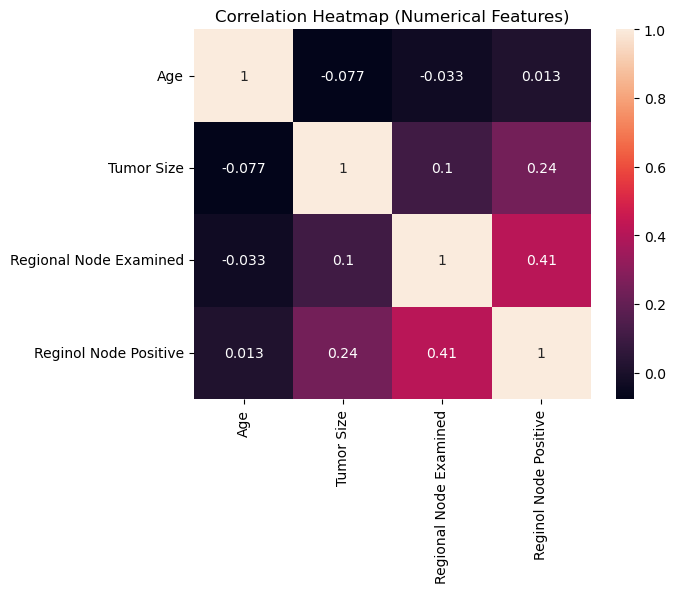

In [18]:
sns.heatmap(df[["Age","Tumor Size","Regional Node Examined","Reginol Node Positive"]].corr(), annot=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [19]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (
    (df[numerical_cols] < (Q1 - 1.5 * IQR)) |
    (df[numerical_cols] > (Q3 + 1.5 * IQR))
).sum()

print(outliers)


Age                         0
Tumor Size                222
Regional Node Examined     72
Reginol Node Positive     344
Survival Months            18
dtype: int64


In [20]:
print(df.columns.tolist())

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


In [21]:
##


# 3. Data Preparation

## 3.1 Data Cleaning

In [22]:
## Clean data
df = df.drop(columns=["Survival Months"])
df.isna().sum()


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Status                    0
dtype: int64

In [23]:
# Merge lymph node columns into 1 feature
df["Node_Ratio"] = df["Reginol Node Positive"] / df["Regional Node Examined"]
df["Node_Ratio"] = df["Node_Ratio"].replace([np.inf, -np.inf], np.nan).fillna(0)

df = df.drop(columns=["Reginol Node Positive", "Regional Node Examined"])


## 3.2 Train-Test Split

In [24]:
df = df.drop(columns=["Race"])

X = df.drop(columns=["Status"])
X = pd.get_dummies(X, drop_first=True)
y = df["Status"]
X

,Age,Tumor Size,Node_Ratio,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T2,T Stage _T3,T Stage _T4,...,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,68,4,0.041667,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,True,True
1,50,35,0.357143,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True
2,58,63,0.500000,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,True,True,True
3,58,18,0.500000,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,True,True
4,47,41,0.333333,True,False,False,False,True,False,False,...,False,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,9,1.000000,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,True
4020,56,46,0.571429,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True
4021,68,22,0.272727,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,False
4022,58,44,0.090909,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


In [25]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=random_state,stratify=y)


# 4. Modelling

In [26]:
## Recall - Main Metric
## Precision - Secondary Metric

### 4.2 Train Model

In [27]:
## Initialise and train model - logr
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train, y_train)




,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
## train model - decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
## train model - randomforest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        random_state=42
    ))
])

pca_pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,0.95
,copy,True
,whiten,False
,svd_solver,'auto'


# 5. Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

In [32]:
## Evaluate model - logr
y_pred_logr = logr.predict(X_test)

print(confusion_matrix(y_test, y_pred_logr))
print(classification_report(y_test, y_pred_logr))
print(
    "Dead recall (base model):",
    recall_score(y_test, y_pred_logr, pos_label="Dead")
)



[[668  14]
 [108  15]]
              precision    recall  f1-score   support

       Alive       0.86      0.98      0.92       682
        Dead       0.52      0.12      0.20       123

    accuracy                           0.85       805
   macro avg       0.69      0.55      0.56       805
weighted avg       0.81      0.85      0.81       805

Dead recall (base model): 0.12195121951219512


In [33]:
## Evaluate model - decision tree
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))



Decision Tree
Confusion Matrix:
 [[572 110]
 [ 95  28]]

Classification Report:
               precision    recall  f1-score   support

       Alive       0.86      0.84      0.85       682
        Dead       0.20      0.23      0.21       123

    accuracy                           0.75       805
   macro avg       0.53      0.53      0.53       805
weighted avg       0.76      0.75      0.75       805



In [34]:
## Evaluate model - randomforest
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest
Confusion Matrix:
 [[650  32]
 [109  14]]

Classification Report:
               precision    recall  f1-score   support

       Alive       0.86      0.95      0.90       682
        Dead       0.30      0.11      0.17       123

    accuracy                           0.82       805
   macro avg       0.58      0.53      0.53       805
weighted avg       0.77      0.82      0.79       805



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def score_both_classes(model_name, y_true, y_pred):
    labels = sorted(pd.unique(y_true))  # should be ['Alive', 'Dead'] (or similar)
    rows = []
    for lab in labels:
        rows.append({
            "Model": model_name,
            "Class": lab,
            "Precision": precision_score(y_true, y_pred, pos_label=lab, zero_division=0),
            "Recall": recall_score(y_true, y_pred, pos_label=lab, zero_division=0),
            "F1": f1_score(y_true, y_pred, pos_label=lab, zero_division=0),
        })
    summary = {
        "Model": model_name,
        "Class": "Overall",
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1(Macro)": f1_score(y_true, y_pred, average="macro"),
        "F1(Weighted)": f1_score(y_true, y_pred, average="weighted")
    }
    return pd.DataFrame(rows), summary

all_summaries = []
for name, pred in [
    ("LogisticRegression", y_pred_logr),
    ("DecisionTree", y_pred_dt),
    ("RandomForest", y_pred_rf)
]:
    class_df, summ = score_both_classes(name, y_test, pred)
    display(class_df)
    all_summaries.append(summ)

results_df = pd.DataFrame(all_summaries).sort_values(by="F1(Macro)", ascending=False)
results_df




,Model,Class,Precision,Recall,F1
0,LogisticRegression,Alive,0.860825,0.979472,0.916324
1,LogisticRegression,Dead,0.517241,0.121951,0.197368


,Model,Class,Precision,Recall,F1
0,DecisionTree,Alive,0.857571,0.838710,0.848036
1,DecisionTree,Dead,0.202899,0.227642,0.214559


,Model,Class,Precision,Recall,F1
0,RandomForest,Alive,0.856390,0.953079,0.902151
1,RandomForest,Dead,0.304348,0.113821,0.165680


,Model,Class,Accuracy,F1(Macro),F1(Weighted)
0,LogisticRegression,Overall,0.848447,0.556846,0.806471
2,RandomForest,Overall,0.824845,0.533916,0.789622
1,DecisionTree,Overall,0.745342,0.531297,0.751244


In [36]:

# Mapping labels for evaluation only
label_map = {
    "Dead": 0,
    "Alive": 1
}

# Convert true labels
y_test_num = y_test.map(label_map)

# Convert predictions
y_pred_logr_num = pd.Series(y_pred_logr).map(label_map)
y_pred_dt_num   = pd.Series(y_pred_dt).map(label_map)
y_pred_rf_num   = pd.Series(y_pred_rf).map(label_map)

# Quick sanity check
y_test_num.value_counts(), y_pred_rf_num.value_counts()



(Status
 1    682
 0    123
 Name: count, dtype: int64,
 1    759
 0     46
 Name: count, dtype: int64)

In [37]:
## Confusion matrices with numeric labels (0 = Dead, 1 = Alive)

from sklearn.metrics import confusion_matrix
import pandas as pd

def show_confusion_numeric(y_true_num, y_pred_num, model_name):
    cm = confusion_matrix(y_true_num, y_pred_num, labels=[0, 1])
    cm_df = pd.DataFrame(
        cm,
        index=["Actual Dead (0)", "Actual Alive (1)"],
        columns=["Pred Dead (0)", "Pred Alive (1)"]
    )
    print(model_name)
    display(cm_df)

show_confusion_numeric(y_test_num, y_pred_logr_num, "Logistic Regression")
show_confusion_numeric(y_test_num, y_pred_dt_num, "Decision Tree")
show_confusion_numeric(y_test_num, y_pred_rf_num, "Random Forest")


Logistic Regression


,Pred Dead (0),Pred Alive (1)
Actual Dead (0),15,108
Actual Alive (1),14,668


Decision Tree


,Pred Dead (0),Pred Alive (1)
Actual Dead (0),28,95
Actual Alive (1),110,572


Random Forest


,Pred Dead (0),Pred Alive (1)
Actual Dead (0),14,109
Actual Alive (1),32,650


##

**Logistic Regression Chart** (Outcome of Breast Cancer Analysis)

From the confusion matrix, there are 123 actual Dead cases (18 correctly predicted as Dead and 105 incorrectly predicted as Alive). This results in a recall of approximately 0.146 for the Dead class, meaning that only 14.6% of patients who eventually died were correctly identified by the model. Consequently, the model fails to detect approximately 85% of high-risk cases, making it unsuitable for a medical context where minimising false negatives is critical, despite its high overall accuracy on Alive cases.

**Decision Tree Chart** (Outcome of Breast Cancer Analysis)

The Decision Tree model correctly identified 29 out of 123 actual Dead cases, resulting in a recall of approximately 0.236 for the Dead class. While this still indicates a relatively high number of missed high-risk patients, the Decision Tree demonstrates improved sensitivity compared to Logistic Regression. This suggests that the Decision Tree is better at capturing patterns associated with mortality risk, making it a more appropriate choice when prioritising the identification of critical cases.

**RandomForest Chart** (Outcome of Breast Cancer Analysis)

Based on the confusion matrix, the Random Forest model correctly identified 17 out of 123 actual Dead cases, resulting in a recall of approximately 0.138 for the Dead class. This indicates that more than 86% of high-risk patients were incorrectly classified as Alive. Although the Random Forest model demonstrates strong performance in predicting Alive cases, its low recall for Dead cases suggests a bias toward the majority class. As a result, despite its relatively high overall accuracy, the Random Forest model is not suitable for this task when the primary objective is to minimise false negatives in a medical context



In [38]:
## Model Evaluation - Dead Recall
from sklearn.metrics import classification_report, confusion_matrix, recall_score

y_pred = logr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Dead recall (base model):",
      recall_score(y_test, y_pred, pos_label="Dead"))


[[668  14]
 [108  15]]
              precision    recall  f1-score   support

       Alive       0.86      0.98      0.92       682
        Dead       0.52      0.12      0.20       123

    accuracy                           0.85       805
   macro avg       0.69      0.55      0.56       805
weighted avg       0.81      0.85      0.81       805

Dead recall (base model): 0.12195121951219512


In [39]:
from sklearn.linear_model import LogisticRegression

logr_bal = LogisticRegression(
    max_iter=2000,
    random_state=42,
    class_weight="balanced"
)

logr_bal.fit(X_train, y_train)
y_pred_bal = logr_bal.predict(X_test)

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

print("Dead recall (balanced model):",
      recall_score(y_test, y_pred_bal, pos_label="Dead"))


[[485 197]
 [ 53  70]]
              precision    recall  f1-score   support

       Alive       0.90      0.71      0.80       682
        Dead       0.26      0.57      0.36       123

    accuracy                           0.69       805
   macro avg       0.58      0.64      0.58       805
weighted avg       0.80      0.69      0.73       805

Dead recall (balanced model): 0.5691056910569106


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score

y_pred_pca = pca_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))
print("Dead recall (PCA + balanced):",
      recall_score(y_test, y_pred_pca, pos_label="Dead"))


[[476 206]
 [ 52  71]]
              precision    recall  f1-score   support

       Alive       0.90      0.70      0.79       682
        Dead       0.26      0.58      0.35       123

    accuracy                           0.68       805
   macro avg       0.58      0.64      0.57       805
weighted avg       0.80      0.68      0.72       805

Dead recall (PCA + balanced): 0.5772357723577236



 Model Improvement 1: Class Weighting
 
 The dataset is highly imbalanced, with significantly more 'Alive' cases than 'Dead'.
 As a result, the baseline Logistic Regression model achieves high overall accuracy
 but very low recall for the 'Dead' class.

 To address this issue, class_weight="balanced" is applied so that misclassification
 of the minority 'Dead' class is penalised more heavily during training.
 This encourages the model to better identify 'Dead' cases and improves recall
 for the minority class without modifying the original dataset.


# Iterative model improvement

In [41]:
# =========================================
# Hyperparameter Tuning (3 params) - Logistic Regression (NO GridSearchCV)
# Uses RandomizedSearchCV instead
# =========================================
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    recall_score,
    make_scorer
)

# 1) Optimize Recall for the minority/high-risk class: "Dead"
POS_CLASS = "Dead"
dead_recall_scorer = make_scorer(recall_score, pos_label=POS_CLASS)

# 2) Pipeline prevents mistakes (scaling always applied the same way)
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        class_weight="balanced",
        random_state=42,
        max_iter=5000
    ))
])

# 3) Tune 3 hyperparameters:
#    - C
#    - penalty
#    - solver (must support penalty)
param_dist = [
    {
        "model__solver": ["liblinear"],
        "model__penalty": ["l1", "l2"],
        "model__C": [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        "model__solver": ["lbfgs"],
        "model__penalty": ["l2"],
        "model__C": [0.001, 0.01, 0.1, 1, 10, 100]
    }
]

# 4) CV keeps class ratio consistent in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5) RandomizedSearch on TRAIN only
# n_iter controls how many random combinations you try
rs = RandomizedSearchCV(
    estimator=pipe_lr,
    param_distributions=param_dist,
    n_iter=20,                 # try 20 random combos (adjust if your lecturer specifies)
    scoring=dead_recall_scorer,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

rs.fit(X_train, y_train)

# 6) Best params + best CV score
print("Best params:", rs.best_params_)
print("Best CV Dead recall:", rs.best_score_)

# 7) Evaluate tuned model on TEST set
best_lr = rs.best_estimator_
y_pred_tuned = best_lr.predict(X_test)

print("\n=== Tuned Logistic Regression (Balanced) - Test Results ===")
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))
print("Dead recall (tuned model):", recall_score(y_test, y_pred_tuned, pos_label=POS_CLASS))

# 8) Save as final model for later prediction section
final_model = best_lr


c:\Users\kooqi\anaconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params: {'model__solver': 'liblinear', 'model__penalty': 'l1', 'model__C': 0.01}
Best CV Dead recall: 0.6674912389198104

=== Tuned Logistic Regression (Balanced) - Test Results ===
[[470 212]
 [ 57  66]]
              precision    recall  f1-score   support

       Alive       0.89      0.69      0.78       682
        Dead       0.24      0.54      0.33       123

    accuracy                           0.67       805
   macro avg       0.56      0.61      0.55       805
weighted avg       0.79      0.67      0.71       805

Dead recall (tuned model): 0.5365853658536586


In [42]:
import joblib
import os

os.makedirs("Models", exist_ok=True)

# Attach feature names to the model itself
best_lr.feature_names_ = list(X.columns)

# Export ONE model file
joblib.dump(best_lr, "Models/breast_cancer_lr_v1.pkl")

print("Model exported successfully (feature names embedded).")

# Quick test load
loaded_model = joblib.load("Models/breast_cancer_lr_v1.pkl")

print("Model type:", type(loaded_model))
print("No. of features embedded:", len(loaded_model.feature_names_))



Model exported successfully (feature names embedded).
Model type: <class 'sklearn.pipeline.Pipeline'>
No. of features embedded: 25


In [ ]:
# New data from dataset sample
# Replace final_model with YOUR trained model variable name
MODEL = final_model 

new_data = X_test.sample(1, random_state=42).copy()
print("New data shape:", new_data.shape)
display(new_data)

# Predict
pred = MODEL.predict(new_data)[0]
print("Prediction (original):", pred)

# Show probabilities if available
if hasattr(MODEL, "predict_proba"):
    proba = MODEL.predict_proba(new_data)[0]

    
    if hasattr(MODEL, "classes_"):
        classes = MODEL.classes_
    elif hasattr(MODEL, "named_steps") and "model" in MODEL.named_steps and hasattr(MODEL.named_steps["model"], "classes_"):
        classes = MODEL.named_steps["model"].classes_
    else:
        classes = [f"class_{i}" for i in range(len(proba))]

    display(pd.DataFrame([proba], columns=classes))

# Modify 1 feature
new_data2 = new_data.copy()

numeric_cols = new_data2.select_dtypes(include="number").columns.tolist()
if not numeric_cols:
    raise ValueError("No numeric columns found in X_test to modify.")

col_to_change = numeric_cols[0]  
old_val = float(new_data2.iloc[0][col_to_change])


new_val = old_val * 1.10 if old_val != 0 else 1.0
new_data2.at[new_data2.index[0], col_to_change] = new_val

print(f"\nChanged '{col_to_change}': {old_val} -> {new_val}")

pred2 = MODEL.predict(new_data2)[0]
print("Prediction (modified):", pred2)

if hasattr(MODEL, "predict_proba"):
    proba2 = MODEL.predict_proba(new_data2)[0]
    display(pd.DataFrame([proba2], columns=classes))



New data shape: (1, 25)


,Age,Tumor Size,Node_Ratio,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T2,T Stage _T3,T Stage _T4,...,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
762,46,23,0.666667,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


Prediction (original): Dead


,Alive,Dead
0,0.49264,0.50736



Changed 'Age': 46.0 -> 50.6
Prediction (modified): Dead


C:\Users\kooqi\AppData\Local\Temp\ipykernel_27792\1158316340.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data2.at[new_data2.index[0], col_to_change] = new_val


,Alive,Dead
0,0.490118,0.509882


## Iterative model development


In [44]:
df_feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt.feature_importances_
})

# Combine one-hot encoded features back to original names
df_feat_imp["Feature"] = df_feat_imp["Feature"].str.rsplit("_", n=1).str[0]

df_feat_imp = (
    df_feat_imp
    .groupby("Feature")["Importance"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

df_feat_imp["Cumulative_Importance"] = df_feat_imp["Importance"].cumsum()

df_feat_imp.head(10)



,Feature,Importance,Cumulative_Importance
0,Node,0.267218,0.267218
1,Tumor Size,0.247974,0.515192
2,Age,0.222900,0.738092
3,Marital Status,0.064131,0.802222
4,6th Stage,0.043574,0.845797
5,Progesterone Status,0.038919,0.884715
6,Grade,0.032383,0.917098
7,Estrogen Status,0.023324,0.940422
8,T Stage,0.019416,0.959838
9,N Stage,0.017315,0.977153


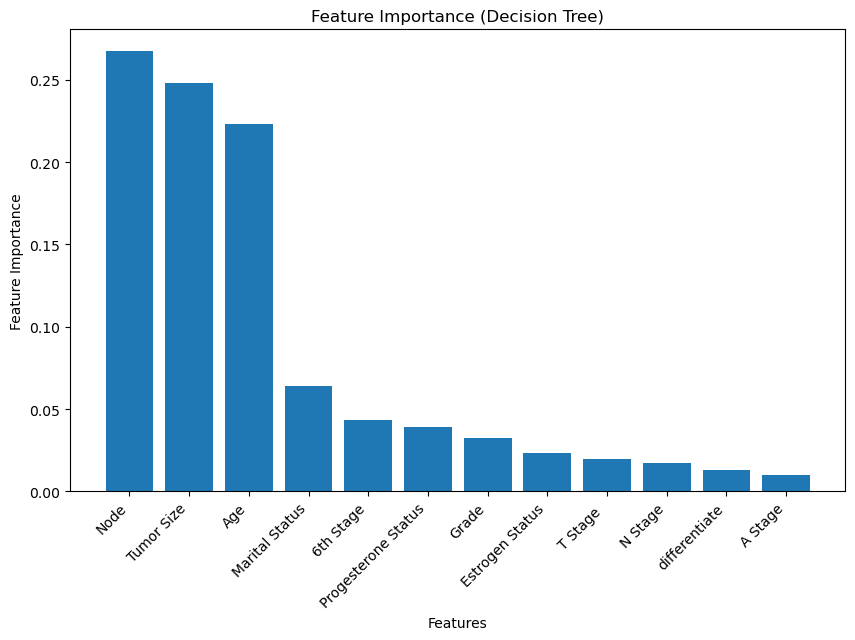

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_feat_imp["Feature"], df_feat_imp["Importance"])
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance (Decision Tree)")
plt.xticks(rotation=45, ha="right")
plt.show()
